# Inequality (GINI) vs Unemployment Rate

## 1. Import libraries and Data Sets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
gini = pd.read_excel("../data/pickles/allginis_2013.xls", sheet_name = 'data')
gini.head()

,country,contcod,region,year,DEININGER,gini_DS,Dinc_DS,Dhh_DS,Dgross_DS,WIDER,...,gini_INDIE,Dinc_INDIE,Dhh_INDIE,Dgross_INDIE,ALLTHEGINI,Giniall,Di,Dhh,Dg,source_of_data
0,Afghanistan,AFG,Asia,1980,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Asia,1981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Asia,1982,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,Asia,1983,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,Asia,1984,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
gini.columns = gini.columns.str.lower()
gini.columns

Index(['country', 'contcod', 'region', 'year', 'deininger', 'gini_ds',
       'dinc_ds', 'dhh_ds', 'dgross_ds', 'wider', 'gini_w', 'dinc_w', 'dhh_w',
       'dgross_w', 'sampl_w', 'enumera_w', 'incdef_w', 'refunit_w', 'lis',
       'gini_lis', 'dinc_lis', 'dhh_lis', 'dgross_lis', 'sedlac',
       'gini_sedlac', 'dinc_sedlac', 'dhh_sedlac', 'dgross_sedlac', 'eeurope',
       'gini_ee', 'dinc_ee', 'dhh_ee', 'dgross_ee', 'wyd', 'gini_wyd',
       'dinc_wyd', 'dhh_wyd', 'dgross_wyd', 'silc', 'gini_silc', 'dinc_silc',
       'dhh_silc', 'dgross_silc', 'povcal', 'gini_povcal', 'dinc_povcal',
       'dhh_povcal', 'indie', 'gini_indie', 'dinc_indie', 'dhh_indie',
       'dgross_indie', 'allthegini', 'giniall', 'di', 'dhh', 'dg',
       'source_of_data'],
      dtype='object')

In [4]:
gini['giniall'].value_counts()

32.000000    16
39.000000    16
31.100000    16
34.200001    15
33.299999    14
             ..
66.500000     1
59.000000     1
44.299999     1
18.000000     1
47.900002     1
Name: giniall, Length: 430, dtype: int64

## 2. Data Wrangling

In [5]:
# Only keep relevant columns
gini2 = gini[['country', 'region', 'year', 'giniall']]
gini2

,country,region,year,giniall
0,Afghanistan,Asia,1980,NaN
1,Afghanistan,Asia,1981,NaN
2,Afghanistan,Asia,1982,NaN
3,Afghanistan,Asia,1983,NaN
4,Afghanistan,Asia,1984,NaN
...,...,...,...,...
8822,Serbia,Eastern Europe,2005,30.299999
8823,Serbia,Eastern Europe,2006,29.700001
8824,Serbia,Eastern Europe,2007,29.400000
8825,Serbia,Eastern Europe,2008,27.500000


In [6]:
gini2.region.value_counts()

Africa            2565
Asia              1854
Latin America     1620
West              1449
Eastern Europe    1339
Name: region, dtype: int64

In [7]:
gini3 = gini2[(gini2['region'] == 'West') | (gini2['region'] == 'Easter Europe')]


In [8]:
gini3.head()

,country,region,year,giniall
300,Australia,West,1950,NaN
301,Australia,West,1951,NaN
302,Australia,West,1952,NaN
303,Australia,West,1953,NaN
304,Australia,West,1954,NaN


In [9]:
#Since some countries in the West are not in Europe, they are excluded
gini3['country'].value_counts()

United States     62
Spain             61
Italy             61
Greece            61
Canada            61
United Kingdom    61
Belgium           59
Ireland           59
Sweden            59
Switzerland       59
Portugal          59
Finland           59
Norway            59
Germany           59
Luxembourg        59
Denmark           59
France            59
Austria           59
Netherlands       59
Israel            59
Turkey            59
Australia         54
New Zealand       51
Iceland           29
Cyprus            29
Greenland         17
Malta             17
Name: country, dtype: int64

In [10]:
# Compare countries in other datasets
country_index = pd.read_csv("../data/output/country_index.csv")
country_index

,geo_time,mean
0,AT,7.077273
1,BE,8.931818
2,BG,7.422727
3,CH,6.155000
4,CY,11.080000
5,CZ,4.200000
6,DE,4.300000
7,DK,7.522727
8,EA,11.331818
9,EA18,11.336364


In [11]:
# Calling a table which has ISO country abbreviations and full country names
countries = pd.read_csv("../data/pickles/countries.csv")
countries.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [12]:
# Merge files
countries_combined = pd.merge(country_index, countries, how= 'left', left_on='geo_time', right_on='country' )
countries_combined.head()

,geo_time,mean,country,latitude,longitude,name
0,AT,7.077273,AT,47.516231,14.550072,Austria
1,BE,8.931818,BE,50.503887,4.469936,Belgium
2,BG,7.422727,BG,42.733883,25.485830,Bulgaria
3,CH,6.155000,CH,46.818188,8.227512,Switzerland
4,CY,11.080000,CY,35.126413,33.429859,Cyprus


In [13]:
# Only keep relevant columns
countries_combined2 = countries_combined[['geo_time', 'name']]
countries_combined2

,geo_time,name
0,AT,Austria
1,BE,Belgium
2,BG,Bulgaria
3,CH,Switzerland
4,CY,Cyprus
5,CZ,Czech Republic
6,DE,Germany
7,DK,Denmark
8,EA,NaN
9,EA18,NaN


In [14]:
# Merge with gini dataframe
gini_combined = pd.merge(gini3, countries_combined2, how = 'left', left_on = 'country', right_on = 'name')
gini_combined.head()

,country,region,year,giniall,geo_time,name
0,Australia,West,1950,NaN,NaN,NaN
1,Australia,West,1951,NaN,NaN,NaN
2,Australia,West,1952,NaN,NaN,NaN
3,Australia,West,1953,NaN,NaN,NaN
4,Australia,West,1954,NaN,NaN,NaN


In [15]:
gini_combined.describe()

,year,giniall
count,1449.000000,494.000000
mean,1979.852312,33.678138
std,16.958847,5.646163
min,1950.000000,16.600000
25%,1965.000000,30.000000
50%,1981.000000,32.900002
75%,1994.000000,36.875001
max,2011.000000,56.000000


In [16]:
# Drop null values
gini_combined2 = gini_combined.dropna()

In [17]:
# USA is not in Europe
gini_combined2.geo_time.value_counts()

US    62
IT    33
DK    27
NL    27
SE    26
NO    23
ES    21
FI    18
FR    17
EL    15
IE    13
LU    12
BE    12
TR    12
AT    11
PT    11
CH     6
CY     6
IS     1
Name: geo_time, dtype: int64

In [18]:
# Exclude USA
gini_combined3 = gini_combined2.loc[gini_combined2['geo_time'] != 'US'].reset_index(drop = True)
gini_combined3.head()

,country,region,year,giniall,geo_time,name
0,Austria,West,1987,23.000000,AT,Austria
1,Austria,West,1991,47.200001,AT,Austria
2,Austria,West,1994,31.200001,AT,Austria
3,Austria,West,1995,30.500000,AT,Austria
4,Austria,West,1997,30.100000,AT,Austria


In [19]:
gini_combined3.describe()

,year,giniall
count,291.000000,291.000000
mean,1991.652921,32.186254
std,12.656461,5.435212
min,1956.000000,16.600000
25%,1983.000000,28.799999
50%,1993.000000,31.600000
75%,2004.000000,35.000000
max,2010.000000,56.000000


In [20]:
# Rearrange columns and drop unnecessary columns
gini_combined4 = gini_combined3[['geo_time', 'year', 'giniall']]
gini_combined4.head()

,geo_time,year,giniall
0,AT,1987,23.000000
1,AT,1991,47.200001
2,AT,1994,31.200001
3,AT,1995,30.500000
4,AT,1997,30.100000


In [21]:
# Take all European countries together 
gini_combined5 = gini_combined4.groupby('year')[['giniall']].mean().reset_index()
gini_combined5.head()

,year,giniall
0,1956,49.000
1,1957,38.000
2,1962,43.625
3,1963,37.000
4,1965,39.500


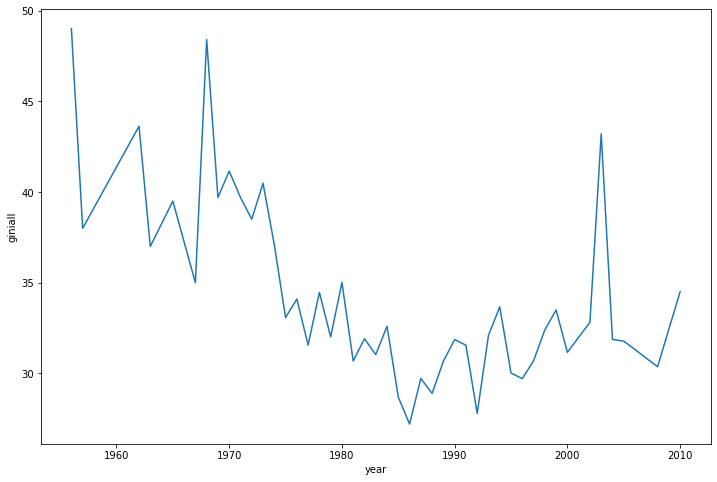

In [22]:
fig, ax = plt.subplots(figsize = (12,8))
sns.lineplot(data = gini_combined5, x = "year", y = "giniall", ax = ax);

In [23]:
unemployment = pd.read_csv("../data/pickles/tps00203.csv")
unemployment.head()

,Unnamed: 0,age,unit,sex,geo,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,Y15-74,PC_ACT,T,AT,4.1,5.3,4.8,4.6,4.9,5.4,5.6,5.7,6.0,5.5,4.9,4.5
1,1,Y15-74,PC_ACT,T,BE,7.0,7.9,8.3,7.2,7.6,8.4,8.5,8.5,7.8,7.1,6.0,5.4
2,2,Y15-74,PC_ACT,T,BG,5.6,6.8,10.3,11.3,12.3,13.0,11.4,9.2,7.6,6.2,5.2,4.2
3,3,Y15-74,PC_ACT,T,CH,NaN,NaN,4.8,4.4,4.5,4.8,4.9,4.8,5.0,4.8,4.7,4.4
4,4,Y15-74,PC_ACT,T,CY,3.7,5.4,6.3,7.9,11.9,15.9,16.1,15.0,13.0,11.1,8.4,7.1


In [24]:
# Drop unnecessary columns
# unemployment.transpose()
unemployment2 = unemployment.drop(columns=['Unnamed: 0'])
unemployment2.head()

,age,unit,sex,geo,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Y15-74,PC_ACT,T,AT,4.1,5.3,4.8,4.6,4.9,5.4,5.6,5.7,6.0,5.5,4.9,4.5
1,Y15-74,PC_ACT,T,BE,7.0,7.9,8.3,7.2,7.6,8.4,8.5,8.5,7.8,7.1,6.0,5.4
2,Y15-74,PC_ACT,T,BG,5.6,6.8,10.3,11.3,12.3,13.0,11.4,9.2,7.6,6.2,5.2,4.2
3,Y15-74,PC_ACT,T,CH,NaN,NaN,4.8,4.4,4.5,4.8,4.9,4.8,5.0,4.8,4.7,4.4
4,Y15-74,PC_ACT,T,CY,3.7,5.4,6.3,7.9,11.9,15.9,16.1,15.0,13.0,11.1,8.4,7.1


In [25]:
# See Units
unemployment2['unit'].value_counts()

THS_PER    39
PC_POP     39
PC_ACT     39
Name: unit, dtype: int64

In [26]:
# See sex
unemployment2['sex'].value_counts()

T    117
Name: sex, dtype: int64

In [27]:
# See geo
# Columns does not only contain countries but also: EA19, EU27_2020, EU28
unemployment2['geo'].value_counts()

EL           3
FX           3
RS           3
ME           3
LU           3
DK           3
ES           3
MK           3
NL           3
TR           3
LT           3
EE           3
IT           3
PL           3
SK           3
PT           3
SI           3
EA19         3
RO           3
DE           3
HU           3
EU28         3
IE           3
CH           3
HR           3
CY           3
AT           3
NO           3
SE           3
BE           3
EU27_2020    3
UK           3
FI           3
MT           3
BG           3
CZ           3
FR           3
LV           3
IS           3
Name: geo, dtype: int64

In [28]:
# Set dataframe to PC_ACT and drop unit, age and sex
unemployment3 = unemployment2.loc[unemployment2['unit'] == 'PC_ACT'].drop(columns=['age', 'sex', 'unit'])
unemployment3.head()

,geo,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,AT,4.1,5.3,4.8,4.6,4.9,5.4,5.6,5.7,6.0,5.5,4.9,4.5
1,BE,7.0,7.9,8.3,7.2,7.6,8.4,8.5,8.5,7.8,7.1,6.0,5.4
2,BG,5.6,6.8,10.3,11.3,12.3,13.0,11.4,9.2,7.6,6.2,5.2,4.2
3,CH,NaN,NaN,4.8,4.4,4.5,4.8,4.9,4.8,5.0,4.8,4.7,4.4
4,CY,3.7,5.4,6.3,7.9,11.9,15.9,16.1,15.0,13.0,11.1,8.4,7.1


In [29]:
# Select EU28 and transpose
unemployment4 = unemployment3.loc[unemployment3['geo'] == 'EU28'].drop(columns=['geo']).transpose()
unemployment4 = unemployment4.reset_index().rename(columns = {'index': 'year', 13: 'unemployment'})
unemployment4

,year,unemployment
0,2008,7.0
1,2009,8.9
2,2010,9.6
3,2011,9.6
4,2012,10.5
5,2013,10.8
6,2014,10.2
7,2015,9.4
8,2016,8.5
9,2017,7.6


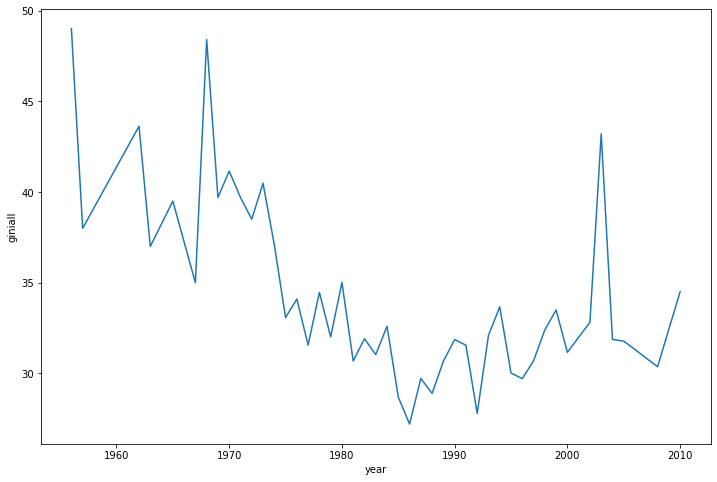

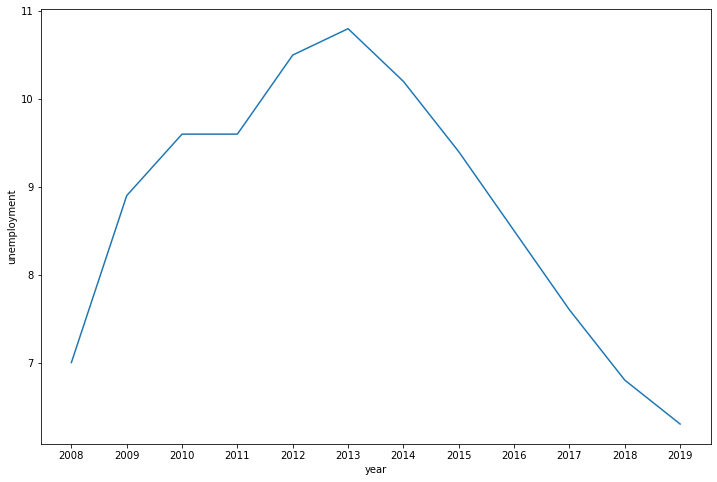

In [30]:
# Insert a column for the mean of all countries
fig, ax = plt.subplots(figsize = (12,8))
sns.lineplot(data = gini_combined5, x = "year", y = "giniall", ax = ax);
fig, ax = plt.subplots(figsize = (12,8))
sns.lineplot(data = unemployment4, x = "year", y = "unemployment", ax = ax);

In [31]:
# Check datatype
unemployment4.dtypes

year             object
unemployment    float64
dtype: object

In [32]:
unemployment4['year'] = pd.to_numeric(unemployment4['year'])
unemployment4['year'].dtypes

dtype('int64')

In [33]:
# Subset unemployment from 2008 to 2012
unemployment5 = unemployment4.loc[unemployment4['year'] <= 2011]

In [34]:
# Check datatype
gini_combined5['year'].dtypes

dtype('int64')

In [35]:
gini_combined5.describe()

,year,giniall
count,47.000000,47.000000
mean,1984.829787,34.256879
std,14.624754,5.039457
min,1956.000000,27.214286
25%,1973.500000,30.941875
50%,1985.000000,32.400000
75%,1996.500000,37.049999
max,2010.000000,49.000000


In [36]:
# Subset gini_combined5 from 2008 to 2011
gini_combined5.loc[gini_combined5['year'] >= 2008]

,year,giniall
45,2008,30.372222
46,2010,34.500000


In [37]:
gini_combined6 = gini_combined5.loc[gini_combined5['year'] < 2012]
gini_combined6

,year,giniall
0,1956,49.000000
1,1957,38.000000
2,1962,43.625000
3,1963,37.000000
4,1965,39.500000
5,1967,34.999999
6,1968,48.400000
7,1969,39.700001
8,1970,41.150000
9,1971,39.700001


In [38]:
# Combine unemployment5 with gini5
gini_unemp = pd.merge(unemployment5, gini_combined6, how = 'inner', left_on = 'year', right_on = 'year')
gini_unemp

,year,unemployment,giniall
0,2008,7.0,30.372222
1,2010,9.6,34.500000


In [39]:
# Load new dataset with more ginis

In [40]:
new_gini = pd.read_csv("../data/pickles/total_unempl.csv")

In [41]:
# Drop unnecessary columns
# unemployment.transpose()
new_gini2 = new_gini.drop(columns=['Unnamed: 0'])
new_gini2.head()

,indic_il,geo,2019,2018,2017,2016,2015,2014,2013,2012,...,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995
0,GINI_HND,AT,27.5,26.8,27.9,27.2,27.2,27.6,27.0,27.6,...,25.8,27.4,NaN,24.0,24.0,26.0,24.0,25.0,26.0,27.0
1,GINI_HND,BE,NaN,25.7,26.1,26.3,26.2,25.9,25.9,26.5,...,26.1,28.3,NaN,28.0,30.0,29.0,27.0,27.0,28.0,29.0
2,GINI_HND,BG,40.8,39.6,40.2,37.7,37.0,35.4,35.4,33.6,...,NaN,NaN,26.0,26.0,25.0,NaN,NaN,NaN,NaN,NaN
3,GINI_HND,CH,NaN,29.7,30.1,29.4,29.6,29.5,28.5,28.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GINI_HND,CY,31.1,29.1,30.8,32.1,33.6,34.8,32.4,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN


In [50]:
# Check first column
new_gini2['indic_il'].value_counts()

GINI_HND    45
Name: indic_il, dtype: int64

In [57]:
# Drop column sind it is not necessary
new_gini3 = new_gini2.drop(columns = 'indic_il')
new_gini3.head()

,geo,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995
0,AT,27.5,26.8,27.9,27.2,27.2,27.6,27.0,27.6,27.4,...,25.8,27.4,NaN,24.0,24.0,26.0,24.0,25.0,26.0,27.0
1,BE,NaN,25.7,26.1,26.3,26.2,25.9,25.9,26.5,26.3,...,26.1,28.3,NaN,28.0,30.0,29.0,27.0,27.0,28.0,29.0
2,BG,40.8,39.6,40.2,37.7,37.0,35.4,35.4,33.6,35.0,...,NaN,NaN,26.0,26.0,25.0,NaN,NaN,NaN,NaN,NaN
3,CH,NaN,29.7,30.1,29.4,29.6,29.5,28.5,28.8,29.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CY,31.1,29.1,30.8,32.1,33.6,34.8,32.4,31.0,29.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN


In [54]:
# EU28 countries
new_gini4 = new_gini3.loc[new_gini3['geo'] == 'EU28']
new_gini4

,geo,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995
19,EU28,NaN,30.8,30.6,30.8,31.0,31.0,30.5,30.5,30.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
new_gini4.pivot(index="geo", columns = 'year', values = 'gini')

KeyError: 'year'

In [44]:
new_gini = new_gini4.reset_index().rename(columns = {'index': 'year', 19: 'gini'})
new_gini5

,year,gini
0,indic_il,GINI_HND
1,geo,EU28
2,2019,NaN
3,2018,30.8
4,2017,30.6
5,2016,30.8
6,2015,31
7,2014,31
8,2013,30.5
9,2012,30.5


In [47]:
# Check datatype
new_gini5['year'].dtypes

dtype('O')

In [48]:
# Turn into numeric
pd.to_numeric(new_gini5['year'])

ValueError: Unable to parse string "indic_il" at position 0

In [ ]:
# Keep larger or equal 2010
new_gini5 = new_gini4.loc[new_gini4['year'] == '2010']